# Estimating the biomass of livestock
To estimate the biomass of fish, we first estimate the total biomass of mesopelagic fish, and then add to this estimate the estmimate for the non-mesopelagic fish made by [Wilson et al.](http://dx.doi.org/10.1126/science.1157972). 

In order to estimate the biomass of mesopelagic fish, we rely on two independent methods - and estimate based on trawling by [Lam & Pauly](http://www.seaaroundus.org/doc/Researcher+Publications/dpauly/PDF/2005/OtherItems/MappingGlobalBiomassMesopelagicFishes.pdf), and an estimate based on sonar.

## Sonar-based estimate
We generate the sonar-based estimate relying on data from [Irigoien et al.](http://dx.doi.org/10.1038/ncomms4271) and [Proud et al.](http://dx.doi.org/10.1016/j.cub.2016.11.003).

Estimating the biomass of mesopelagic fish using sonar is a two step process. First we use estimates of the global backscatter of mesopelagic fish. This backscatter is converted to an estimate of the global biomass of mesopelagic fish by using estimates for the target strength of a single mesopelagic fish.

### Total backscatter
To estimate the total backscatter of mesopelagic fish, we rely on [Irigoien et al.](http://dx.doi.org/10.1038/ncomms4271) and [Proud et al.](http://dx.doi.org/10.1016/j.cub.2016.11.003). Irigoien et al. generates several different estimates for the global  nautical area scatter of mesopelagic fish. We use the geometric mean of the estimates of Irigoien et al. as one source for estimating the total backscatter of mesopelagic fish. We note that the units used by Irigoien et al. are incorrect, as nautical area scatteing coefficient (NASC) is measured in $\frac{m^2}{nm^2}$, but the order of magnitude of the values estimated by Irigoien et al. implies that they multiplied the NASC by the surface area of the ocean in units of $m^2$. This means that the values reported by Irigoien et al. are in fact in units of $\frac{m^4}{nm^2}$. We convert the values reported by Irigoein et al. from the total scatter to the total backscatter by using the equation: $$global \: backscatter \: [m^2] = \frac{global \: scatter \: [\frac{m^4}{nmi^2}]}{4\pi×\frac{1852^2 m^2}{nmi^2}}$$ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
pd.options.display.float_format = '{:,.1e}'.format
from scipy.stats import gmean
import sys
sys.path.insert(0, '../../../statistics_helper')
from CI_helper import *

# Load scatter data from Irigoien et al.
scatter = pd.read_excel('irigoien_et_al_data.xlsx', 'Total scatter',skiprows=1)

# convert scater to backscatter
scatter['Total backscatter [m^2]'] = scatter['Total sA [m^4 nmi^-2]']/(4*np.pi*1852**2)
scatter['Total sA [m^4 nmi^-2]'] = scatter['Total sA [m^4 nmi^-2]'].astype(float)
scatter

sA estimate  Total sA [m^4 nmi^-2]  \
0                   OLS: sA = 2384.4* ln(PP) – 11678                4.2e+17   
1                 OLS: ln (sA) = 1.52* ln(PP) – 1.36                4.7e+17   
2                   GWR: ln(sA) = 1.36*ln (PP) – 0.2                5.6e+17   
3  GWR different equations for PP above and below...                4.4e+17   
4  Cruise average sA  × ocean surface deeper than...                4.1e+17   

   Total backscatter [m^2]  
0                  9.8e+09  
1                  1.1e+10  
2                  1.3e+10  
3                  1.0e+10  
4                  9.6e+09

In [2]:
# Calculate the geometric mean of values from Irigoien et al.
irigoien_backscatter = gmean(scatter['Total backscatter [m^2]'])
print('The geometric mean of global backscatter from Irigoien et al. is ≈%.1e m^2' %irigoien_backscatter)

The geometric mean of global backscatter from Irigoien et al. is ≈1.1e+10 m^2


As our best estimate for the global backscatter of mesopelagic fish, we use the geometric mean of the average value from Irigoien et al. and the value reported in Proud et al.

In [3]:
# The global backscatter reported by Proud et al.
proud_backscatter = 6.02e9

# Our best estimate 
best_backscatter = gmean([irigoien_backscatter,proud_backscatter])
print('Our best estimate for the global backscatter of mesapelagic fish is %.0e m^2' %best_backscatter)

Our best estimate for the global backscatter of mesapelagic fish is 8e+09 m^2


### Target strength
In order to convert the global backscatter into biomass, we use reported values for the target strength per unit biomass of mesopelagic fish. The target strength is a measure of the the backscattering cross-section in dB, which is defined as $TS = 10 \times log_{10}(\sigma_{bs})$ with units of dB 1 re $m^2$. By measuring the relation between the target strength and biomass of mesopelagic fish, one can calculate the target strength per unit biomass in units of db 1 re $\frac{m^2}{kg}$. We can use the global backscatter to calculate the total biomass of mesopelagic fish based on the equation provided in [MacLennan et al.](https://doi.org/10.1006/jmsc.2001.1158): $$biomass_{fish} \:[kg]= \frac{global \: backscatter \: [m^2]}{10^{\frac{TS_{kg}}{10}} [m^2 kg^{-1}]}$$
Where $TS_{kg}$ is the terget strength per kilogram biomass.

The main source affecting the target strength of mesopelagic fish is their swimbaldder, as the swimbladder serves as a strong acoustic reflector at the frequencies used to measure the backscattering of mesopelagic fish. Irigoien et al. provide a list of values from the literature of target strength per unit biomass for mesopelagic fish with or without swimbladder. It is clear from the data that the presence or absence of swimbladder segregates the data into two distinct groups:

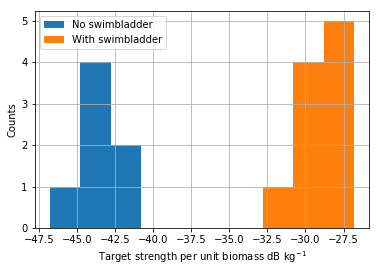

In [4]:
# Load terget strength data
ts = pd.read_excel('irigoien_et_al_data.xlsx', 'Target strength')

# Plot the distribution of TS for fish with or without swimbladder
ts[ts['Swimbladder']=='No']['dB kg^-1'].hist(label='No swimbladder', bins=3)
ts[ts['Swimbladder']=='Yes']['dB kg^-1'].hist(label='With swimbladder', bins=3)
plt.legend()
plt.xlabel(r'Target strength per unit biomass dB kg$^{-1}$')
plt.ylabel('Counts')

To estimate the characteristic target strength per unit biomass of mesopelagic fish, we first estiamte the characteristic target strength per unit biomass of fish with or without swimbladder. We assume that fish with and without swimbladder represent an equal portion of the population of mesopelagic fish. We test the uncertainty associated with this assumption in the uncertainty analysis section.

In [5]:
# Calculate the average TS per kg for fish with and without swimbladder
TS_bin = ts.groupby('Swimbladder').mean()
TS_bin['dB kg^-1']

Swimbladder
No    -4.3e+01
Yes   -2.9e+01
Name: dB kg^-1, dtype: float64

We use our best estimate for the target strength per unit biomass to estimate the total biomass of mesopelagic fish. We transform the TS to backscattering cross-section, and then calculate the effective population backscattering cross-section based on the assumption that fish with or without swimbladder represent equal portions of the population.

In [6]:
# The conversion equation from global backscatter and terget strength per unit biomass
biomass_estimator = lambda TS1,TS2,bs,frac: bs/(frac*10**(TS1/10.) + (1.-frac)*10**(TS2/10.))

# Estimate biomass and convert to g C, assuming fish with or without swimbladder are both 50% of the population
sonar_biomass = biomass_estimator(*TS_bin['dB kg^-1'],best_backscatter,frac=0.5)*1000*0.15
print('Our best sonar-based estimate for the biomass of mesopelagic fish is ≈%.1f Gt C' %(sonar_biomass/1e15))

Our best sonar-based estimate for the biomass of mesopelagic fish is ≈1.8 Gt C


As noted in the Supplementary Information, there are several caveats which might bias the results. We use the geometric mean of estimates based on sonar and earlier estimates based on trawling to generate a robust estimate for the biomass of mesopelagic fish.

In [7]:
# The estimate of the global biomass of mesopelagic fish based on trawling reported in Lan & Pauly
trawling_biomass = 1.5e14

# Estimate the biomass of mesopelagic fish based on the geometric mean of sonar-based and trawling-based estimates
best_mesopelagic_bioamss = gmean([sonar_biomass,trawling_biomass])
print('Our best estimate for the biomass of mesopelagic fish is ≈%.1f Gt C' %(best_mesopelagic_bioamss/1e15))

Our best estimate for the biomass of mesopelagic fish is ≈0.5 Gt C


Finally, we add to our estimate of the biomass of mesopelagic fish the estimate of biomass of non-mesopelagic fish made by [Wilson et al.](http://dx.doi.org/10.1126/science.1157972) to generate our estimate for the total biomass of fish.

In [8]:
# The estimate of non-mesopelagic fish based on Wilson et al.
non_mesopelagic_fish_biomass = 1.5e14

best_estimate = best_mesopelagic_bioamss+non_mesopelagic_fish_biomass
print('Our best estimate for the biomass of fish is ≈%.1f Gt C' %(best_estimate/1e15))

Our best estimate for the biomass of fish is ≈0.7 Gt C


# Uncertainty analysis
In order to assess the uncertainty associated with our estimate for the biomass of fish, we assess the uncertainty associated with the sonar-based estimate of the biomass of mesopelagic fish, as well as for the non-mesopelagic fish biomass.

## Mesopelagic fish uncertainty
To quantify the uncertainty associated with our estimate of the biomass of mesopelagic fish, we assess the uncertainty associated with the sonar-based estimate, and the inter-method uncertainty between the sonar-based and trawling-based estimates. We do not assess the uncertainty of the trawling-based estimate as no data regarding the uncertainty of the estimate is available.

### Sonar-based estimate uncertainty
The main parameters influencing the uncertainty of the sonar-based estimates are the global backscatter and the characteristic target-strength per unit biomass. We calculate the uncertainty associated with each one of those parameters, and them combine these uncertainties to quantify the uncertainty of the sonar-based estimate.

#### Global Backscatter
For calculating the global backscatter, we rely in two sources of data - Data from Irigoien et al. and data from Proud et al. We survery both the intra-study uncertainty and interstudy uncertainty associated with the global backscatter.

##### Intra-study uncertainty
Irigoien et al. provides several estimates for the global scatter based on several different types of equations characterizing the relationship between primary productivity and the NASC. We calculate the 95% confidence interval of the geometric mean of these different estimates.

Proud et al. estimate a global backscatter of 6.02×$10^9$ $m^2$ ± 1.4×$10^9$ $m^2$. We thus use this range as a measure of the intra-study uncertainty in the estimate of Proud et al.


In [9]:
# Calculate the intra-study uncertainty of Irigoien et al.
irigoien_CI = geo_CI_calc(scatter['Total backscatter [m^2]'])

# Calculate the intra-study uncertainty of Proud et al.
proud_CI = (1.4e9+6.02e9)/6.02e9

print('The intra-study uncertainty of the total backscatter estimate of Irigoien et al. is ≈%.1f-fold' %irigoien_CI)
print('The intra-study uncertainty of the total backscatter estimate of Proud et al. is ≈%.1f-fold' %proud_CI)

The intra-study uncertainty of the total backscatter estimate of Irigoien et al. is ≈1.1-fold
The intra-study uncertainty of the total backscatter estimate of Proud et al. is ≈1.2-fold


##### Interstudy uncertainty
As a measure of the interstudy uncertainty of the global backscatter, we calculate the 95% confidence interval of the geometric mean of the estimate from Irigoien et al. and Proud et al.:

In [10]:
# Calculate the interstudy uncertainty of the global backscatter
bs_inter_CI = geo_CI_calc([irigoien_backscatter,proud_backscatter])

print('The interstudy uncertainty of the total backscatter  is ≈%.1f-fold' %bs_inter_CI)

# Take the highest uncertainty as our best projection of the uncertainty associates with the global backscatter
bs_CI = np.max([irigoien_CI,proud_CI,bs_inter_CI])

The interstudy uncertainty of the total backscatter  is ≈1.7-fold


We use the highest uncertainty among these different kinds of uncertainty measures as our best projection of the uncertainty of the global backscatter, which is ≈1.7-fold.

#### Target strength per unit biomass
To assess the uncertainty associated with the target strength per unit biomass, we calculate the uncertainty in estimating the characteristic target strength per unit biomass of fish with or without swimbladders, adn the uncertainty associated with the fraction of the population that either has or lacks swimbladder

##### Uncertainty of characteristic target strength per unit biomass of fish with or without swimbladder
We calculate the 95% confidence interval of the target strength of fish with or withour swimbladder, and propagate this confidence interval to the total estimate of biomass to assess the uncertainty associated with the estimate of the target strength. We calculated an uncertainty of ≈1.3-fold. associated with te estimate of the target strength per unit biomass of fish.

In [11]:
# Define the function that will estimate the 95% confidence interval
def CI_groupby(input):
    return input['dB kg^-1'].std(ddof=1)/np.sqrt(input['dB kg^-1'].shape[0])

# Group target strength values by the presence of absence of swimbladder
ts_bin = ts.groupby('Swimbladder')

# Calculate sandard error of those values
ts_bin_CI = ts_bin.apply(CI_groupby)
ts_CI = []

# For the target strength of fish with or without swimbladder, sample 1000 times from the distribution
# of target strengths, and calculate the estimate of the total biomass of fish. Then calcualte the 95%
# confidence interval of the resulting distribution as a measure of the uncertainty in the biomass 
# estimate resulting from the uncertainty in the target strength

for x, instance in enumerate(ts_bin_CI):
    ts_dist = np.random.normal(TS_bin['dB kg^-1'][x],instance,1000)
    biomass_dist = biomass_estimator(ts_dist,TS_bin['dB kg^-1'][1-x],best_backscatter,frac=0.5)*1000*0.15
    upper_CI = np.percentile(biomass_dist,97.5)/np.mean(biomass_dist)
    lower_CI = np.mean(biomass_dist)/np.percentile(biomass_dist,2.5)
    ts_CI.append(np.mean([upper_CI,lower_CI]))
# Take the maximum uncertainty of the with or with out swimbladder as our best projection
ts_CI = np.max(ts_CI)
print('Our best projection for the uncertainty associated with the estimate of the target strength per unit biomass is ≈%.1f-fold' %ts_CI)

Our best projection for the uncertainty associated with the estimate of the target strength per unit biomass is ≈1.3-fold


##### Uncertainty of the fraction of the population possessing swimbladder
As a measure of the uncertainty associated with the assumption that fish with or without swimbladder contributed similar portions to the total population of mesopelagic fish, we sample different ratios of fish with and without swimbladder, and calculate the biomass estimate for those fractions.

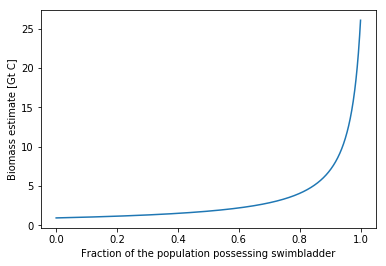

In [12]:
# Sample different fractions of fish with swimbladder
ratio_range = np.linspace(0,1,1000)

# Estiamte the biomass of mesopelagic fish using the sampled fraction
biomass_ratio_dist = biomass_estimator(*TS_bin['dB kg^-1'],best_backscatter,ratio_range)*1000*0.15/1e15

# Plot the results for all fractions
plt.plot(ratio_range,biomass_ratio_dist)
plt.xlabel('Fraction of the population possessing swimbladder')
plt.ylabel('Biomass estimate [Gt C]')

We take the 95% range of distribution of fraction of fish with swimbladder account and calculate the uncertainty this fraction introduces into the sonar-based estimate of mesopelagic fish biomass. In this range the confidence interval of the biomass estimate is ≈8.7-fold.

In [13]:
# Calculate the upper and lower bounds of the influence of the fraction of fish with swimbladder on biomass estimate
ratio_upper_CI = (biomass_estimator(*TS_bin['dB kg^-1'],best_backscatter,0.975)*1000*0.15)/sonar_biomass
ratio_lower_CI = sonar_biomass/(biomass_estimator(*TS_bin['dB kg^-1'],best_backscatter,0)*1000*0.15)
ratio_CI = np.max([ratio_upper_CI,ratio_lower_CI])
print('Our best projection for the uncertainty associated with the fraction of fish possessing swimbladder is ≈%.1f-fold' %ratio_CI)

Our best projection for the uncertainty associated with the fraction of fish possessing swimbladder is ≈8.7-fold


To calculate the total uncertainty associated with the sonar-based estimate, we propagate the uncertainties associated with the total backscatter, the target strength per unit biomass and the fraction of fish with swimbladder.


In [14]:
sonar_CI = CI_prod_prop(np.array([ratio_CI,ts_CI,bs_CI]))
print('Our best projection for the uncertainty associated with the sonar-based estimate for the biomass of mesopelagic fish is ≈%.1f-fold' %sonar_CI)

Our best projection for the uncertainty associated with the sonar-based estimate for the biomass of mesopelagic fish is ≈9.4-fold


### Inter-method uncertainty
As a measure of the inter-method uncertainty of our estimate of the biomass of mesopelagic fish, we calculate the 95% confidence interval of the geometric mean of the sonar-based estiamte and the trawling-based estimate.

In [15]:
meso_inter_CI = geo_CI_calc(np.array([sonar_biomass,trawling_biomass]))
print('Our best projection for the inter method uncertainty associated with estimate of the biomass of mesopelagic fish is ≈%.1f-fold' %meso_inter_CI)

# Take the highest uncertainty as our best projection for the uncertainty associated with the estimate
# of the biomass of mesopelagic fish
meso_CI = np.max([meso_inter_CI,sonar_CI])

Our best projection for the inter method uncertainty associated with estimate of the biomass of mesopelagic fish is ≈11.3-fold


Comparing our projections for the uncertainty of the sonar-based estimate of the biomass of mesopelagic fish and the inter-method uncertainty, our best projection for the biomass of mesopelagic fish is about one order of magnitude.

## Non-mesopelagic fish biomass uncertainty
For estimating the biomass of non-mesopelagic fish, we rely on estimates by Wilson et al., which does not report an uncertainty range for the biomass of non-meso pelagic fish. A later study ([Jennings et al.](https://doi.org/10.1371/journal.pone.0133794), gave an estimate for the total biomass of fish with body weight of 1 g to 1000 kg, based on ecological models. Jenning et al. reports a 90% confidence interval of 0.34-26.12 Gt wet weight, with a median estimate of ≈5 Gt wet weight. We take this range as a crude measure of the uncertainty associated with the estimate of the biomass of non-mesopelagic fish.

In [16]:
# Calculate the uncertainty of the non-mesopelagic fish biomass
non_meso_CI = np.max([26.12/5,5/0.34])

# Propagate the uncertainties of mesopelagic fish biomass and non-mesopelagic fish biomass to the total estimate
# of fish biomass
mul_CI = CI_sum_prop(estimates=np.array([best_mesopelagic_bioamss,non_mesopelagic_fish_biomass]), mul_CIs=np.array([meso_CI,non_meso_CI]))
print('Our best projection for the uncertainty associated with the estimate of the biomass of fish is ≈%.1f-fold' %mul_CI)

Our best projection for the uncertainty associated with the estimate of the biomass of fish is ≈8.2-fold
